# Roadmap
- Compare to Weston paper
- Overleaf prepare
- NTH: Kernel function

# Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Classifier

In [42]:
class LinearSVM(object):
    
    def __init__(self, X, y, reg=1e-5, delta=1.0, learning_rate=(lambda it : 1e-7), num_iters=100):
        num_train, dim = X.shape
        num_classes = len(np.unique(y))
        
        self.W = 0.001 * np.random.randn(num_classes, dim)
        self.reg = reg
        self.delta = delta
        
        for it in range(num_iters):
            #train_indices = np.random.choice(num_train, 100) # stochastic gradient descent
            self.W -= learning_rate(it) * self.grad(X, Y)
            if it % 100 == 0:
                print(f'iteration {it} / {num_iters}: neo loss {self.loss(X, Y)}')
    
    def loss(self, X, Y):
        # Data loss
        data_loss = 0.0
        for i in range(len(X)):
            scores = self.W.dot(X[i])
            correct_class_score = scores[Y[i]]
            for j in range(len(self.W)):
                if Y[i] != j:
                    data_loss += max(0, scores[j] - correct_class_score + self.delta)
        data_loss /= float(len(X))
        # Total loss
        return data_loss + self.reg * np.sum(self.W * self.W)

    def grad(self, X, Y):
        # Renames
        n, dim = X.shape
        kn = len(self.W)
        # Scores
        positive_losses = self.W.dot(X.T) > 0 # kn x n
        # I think I should adjust force zero of samples with their real classes
        # Contributions
        contributions = np.zeros((kn, n))
        contributions[positive_losses] = 1 # positive contributions
        loss_count_per_class = np.sum(positive_losses, axis=0)
        contributions[Y, np.arange(n)] -= loss_count_per_class # negative contributions
        # Loss gradient 
        data_loss_gradient = contributions.dot(X) / float(n)
        return data_loss_gradient + self.reg * (2 * self.W)
    
    def predict(self, X):
        scores = self.W.dot(X.T).T
        return np.argmax(scores, axis=1)
    

# Sampling

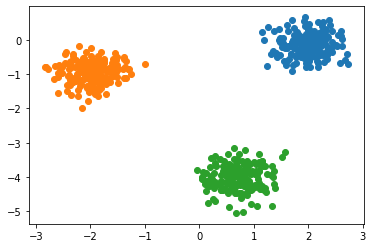

In [25]:
# Parameters
N_1 = 200
MU_1 = [2.0, -0.1]
SIGMA_1 = np.eye(2) * 0.1
N_2 = 200
MU_2 = [-2.0, -1.0]
SIGMA_2 = np.eye(2) * 0.1
N_3 = 200
MU_3 = [0.75, -4.0]
SIGMA_3 = np.eye(2) * 0.1

# Sample
X_1 = np.random.multivariate_normal(MU_1, SIGMA_1, N_1)
X_2 = np.random.multivariate_normal(MU_2, SIGMA_2, N_2)
X_3 = np.random.multivariate_normal(MU_3, SIGMA_3, N_3)

# Unify
X = np.vstack( (X_1, X_2, X_3) )
Y = np.array([0]*N_1 + [1]*N_2 + [2]*N_3)

# Append bias
X = np.hstack( (X, np.ones((X.shape[0], 1))) )

# Invariants
assert(len(X) == len(Y))
assert(X.shape[1] == 3)

# Plot
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()

# Training

In [39]:
svm = LinearSVM(X, Y, learning_rate=(lambda it : 1e-7), reg=5e4, num_iters=2000)

iteration 0 / 2000: neo loss 2.437503596513248
iteration 100 / 2000: neo loss 2.058343341232485
iteration 200 / 2000: neo loss 2.0076826356021695
iteration 300 / 2000: neo loss 2.0009455383200967
iteration 400 / 2000: neo loss 2.0000568550095332
iteration 500 / 2000: neo loss 1.9999579571272386
iteration 600 / 2000: neo loss 1.9999692203148693
iteration 700 / 2000: neo loss 1.9999814131595424
iteration 800 / 2000: neo loss 1.9999892597624067
iteration 900 / 2000: neo loss 1.9999939424297986
iteration 1000 / 2000: neo loss 1.9999964870809421
iteration 1100 / 2000: neo loss 1.9999978059746846
iteration 1200 / 2000: neo loss 1.9999985357151935
iteration 1300 / 2000: neo loss 1.999998925974872
iteration 1400 / 2000: neo loss 1.9999991497722793
iteration 1500 / 2000: neo loss 1.9999992318593678
iteration 1600 / 2000: neo loss 1.999999260307801
iteration 1700 / 2000: neo loss 1.9999992740086066
iteration 1800 / 2000: neo loss 1.9999992774644115
iteration 1900 / 2000: neo loss 1.9999992819253

# Prediction

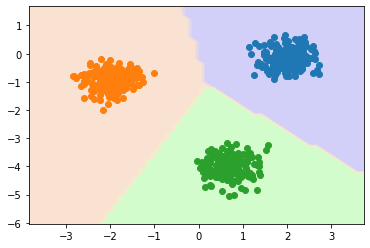

In [41]:
nx = 50
ny = 50

xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, nx),
                     np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, ny))

X_pred = np.hstack((xx.reshape((-1, 1)), yy.reshape((-1, 1)), np.ones((nx*ny, 1))))
Y_pred = svm.predict(X_pred)

cm = LinearSegmentedColormap.from_list('multi-classify', [(0.8,0.8,1), (1,0.9,0.8), (0.8, 1, 0.8)])

plt.contourf(xx, yy, Y_pred.reshape((ny, nx)), cmap=cm)
plt.scatter(X_1[:,0], X_1[:,1], c='tab:blue')
plt.scatter(X_2[:,0], X_2[:,1], c='tab:orange')
plt.scatter(X_3[:,0], X_3[:,1], c='tab:green')
plt.show()